<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/mi_0_Interpolation_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation of data
- Börge Göbel

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

## 1. Generate data points

In [4]:
x_list = np.linspace(-5,5,21)
data0 = np.array([x_list, 15 + 2.4*x_list -0.5*x_list**2 -0.35*x_list**3])
data = np.array([data0[0] + 0.25 * (2*np.random.rand(21)-1), data0[1] + 5.0 * (2*np.random.rand(21)-1)])

In [5]:
print(x_list)

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


In [6]:
print(data0[0])

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


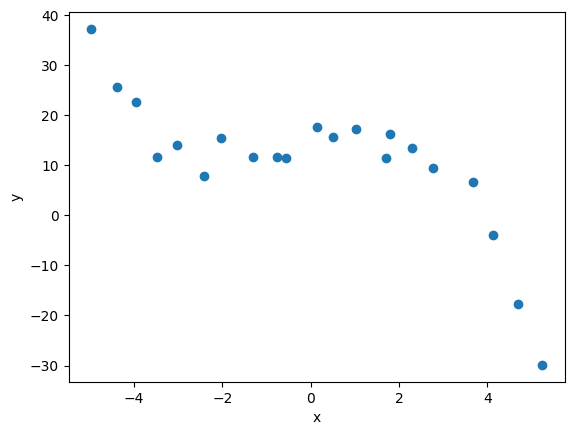

In [4]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])

## 2. Fitting a model function

Finding parameters of a model function such that error is minimized.

### 2.1 Define model function

We consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3\\)

In [11]:
def polinomialModel(x, a):
  return a[0]+a[1]*x+a[2]*x**2+a[3]*x**3

Let's test our new function

[ 0.39526239 -0.87954906  0.33353343  0.34127574]


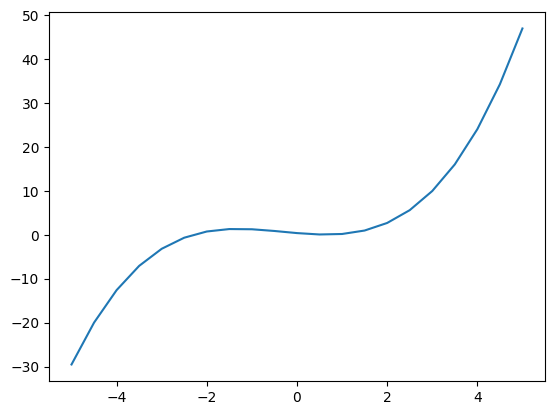

In [13]:
# Starting values for the coefficients
a = 2*np.random.rand(4)-1
print(a)

plt.plot(x_list, polinomialModel(x_list,a))

### 2.2 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) \frac{\partial}{\partial a_k}f(x_i) = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) x_i^{k}\\)

Remember: \\( \Delta = \sum_{i=1}^n \left(f(x_i)-y_i\right)^2 = \sum_{i=1}^n \left(a_0 + a_1 x_i + a_2 x_i^2 + \dots + a_n x_i^n-y_i\right)^2 \\)

In [8]:
#Esta funcion necesita modificarse para incluir k
#def errorFitGradient(f,coefficients,data):
# return 2*sum((f(data[0,:],coefficients) - data[1,:])*data[0,:]**k)

In [9]:
def errorFitGradient(f,coefficients,data):
  return 2 * np.array([
      np.sum((f(data[0,:],coefficients) - data[1,:])*data[0,:]**k)
    for k in range(4)])

In [14]:
errorFitGradient(polinomialModel, a, data)

array([ -274.96086574,  3260.19590312,  1033.60781245, 71705.53934111])

### 2.3 Loop for the actual fitting

In [15]:
iterations = 100000
# learning rate
h = 0.00001

In [17]:
for i in range(iterations):
  a = a - h * errorFitGradient(polinomialModel,a, data)

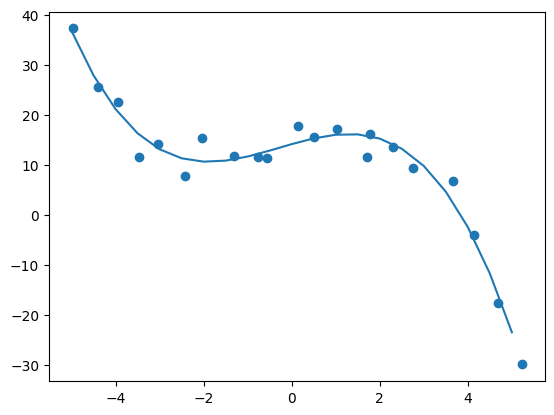

In [18]:
plt.scatter(data[0], data[1])
plt.plot(x_list, polinomialModel(x_list,a))

\\( f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3\\) with parameters:

In [19]:
print(a)

[14.13819122  2.5169182  -0.29951166 -0.34150612]
